In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/literacy/average-literacy-score-piaac-test-vs-national-literacy-rate-cia.csv
/kaggle/input/literacy/mode-of-reporting-literacy-rates.csv
/kaggle/input/literacy/numeracy-vs-literacy-skills-of-adults.csv
/kaggle/input/literacy/literacy-rate-adult-total-dhs-surveys-vs-unesco.csv
/kaggle/input/literacy/share-of-the-population-with-basic-numeracy-skills-by-birth-decade.csv
/kaggle/input/literacy/literate-and-illiterate-world-population.csv
/kaggle/input/literacy/cross-country-literacy-rates.csv
/kaggle/input/literacy/literacy-rate-source-type.csv
/kaggle/input/literacy/literacy-rates-vs-average-years-of-schooling.csv
/kaggle/input/literacy/literacy-rate-of-young-men-and-women.csv
/kaggle/input/literacy/literacy-by-years-of-schooling-us-1947.csv
/kaggle/input/literacy/literacy-rates-of-the-the-younger-population-15-24-years-versus-literacy-rates-of-the-older-population-65.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/kaggle/input/literacy/cross-country-literacy-rates.csv")
df.head(10)

,Entity,Code,Year,"Literacy rates (World Bank, CIA World Factbook, and other sources)"
0,Afghanistan,AFG,1979,18.157681
1,Afghanistan,AFG,2011,31.741119
2,Afghanistan,AFG,2015,38.168041
3,Albania,ALB,2001,98.712982
4,Albania,ALB,2008,95.938637
5,Albania,ALB,2011,96.845299
6,Albania,ALB,2012,97.246971
7,Albania,ALB,2015,97.553902
8,Algeria,DZA,1987,49.630878
9,Algeria,DZA,2002,69.873497


In [13]:
df.head()

,Code,Year,"Literacy rates (World Bank, CIA World Factbook, and other sources)",country
0,AFG,1979,18.157681,Afghanistan
1,AFG,2011,31.741119,Afghanistan
2,AFG,2015,38.168041,Afghanistan
3,ALB,2001,98.712982,Albania
4,ALB,2008,95.938637,Albania


<Axes: ylabel='Frequency'>

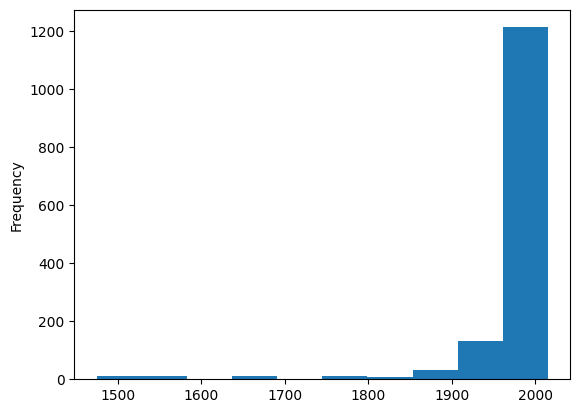

In [15]:
df['Year'].plot(kind="hist")

our data is left skewd which mean that the avgrage (mean) is less than median and mode

In [19]:
df['Year'].value_counts().sort_values()

Year
1959      1
1952      1
1947      1
1969      2
1890      2
       ... 
2014     54
2011     64
2010     83
2000     84
2015    156
Name: count, Length: 65, dtype: int64

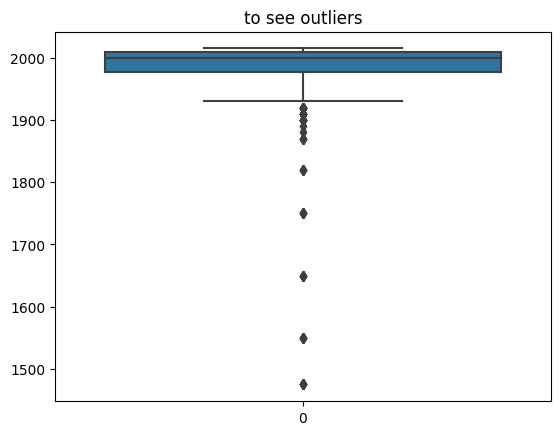

In [21]:
import seaborn as sns
plt.title("to see outliers")
sns.boxplot(df["Year"]);

In [27]:
mask=2015-df['Year']<=115
df=df[mask]

In [28]:
df.shape

(1364, 4)

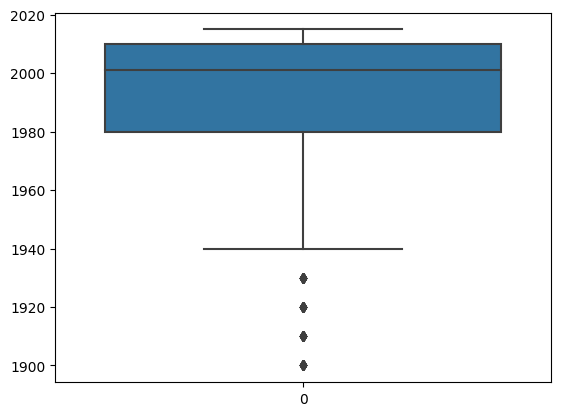

In [29]:
sns.boxplot(df["Year"]);

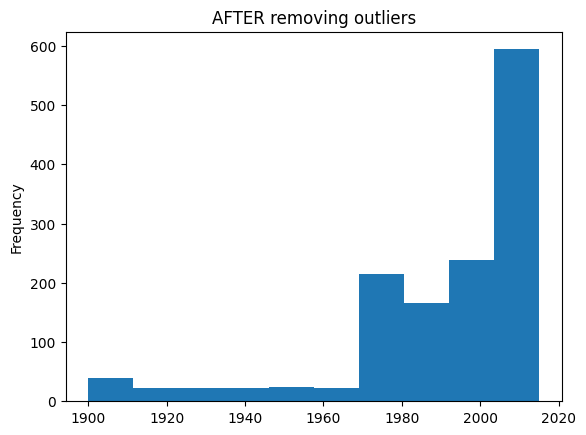

In [32]:
df['Year'].plot(kind="hist")
plt.title("AFTER removing outliers");

In [33]:
df.columns

Index(['Code', 'Year',
       'Literacy rates (World Bank, CIA World Factbook, and other sources)',
       'country'],
      dtype='object')

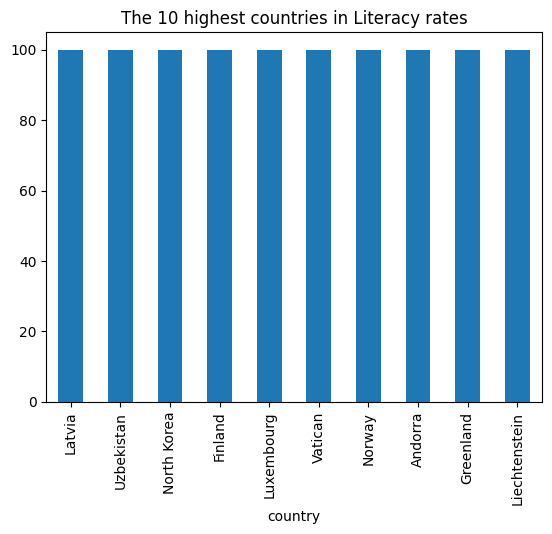

In [35]:
df.groupby("country")['Literacy rates (World Bank, CIA World Factbook, and other sources)'].median().sort_values().tail(10).plot(kind="bar")
plt.title("The 10 highest countries in Literacy rates");

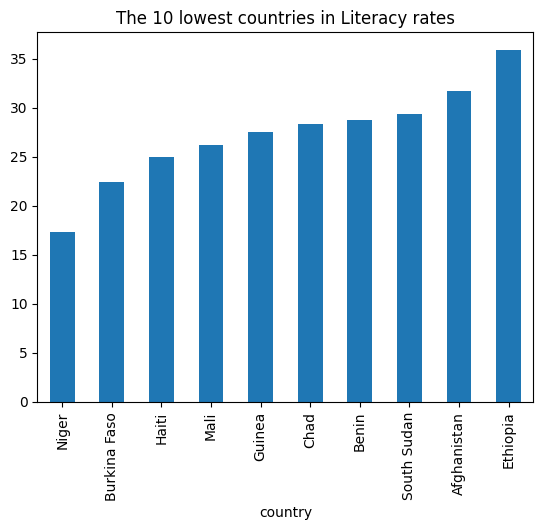

In [36]:
df.groupby("country")['Literacy rates (World Bank, CIA World Factbook, and other sources)'].median().sort_values().head(10).plot(kind="bar")
plt.title("The 10 lowest countries in Literacy rates");

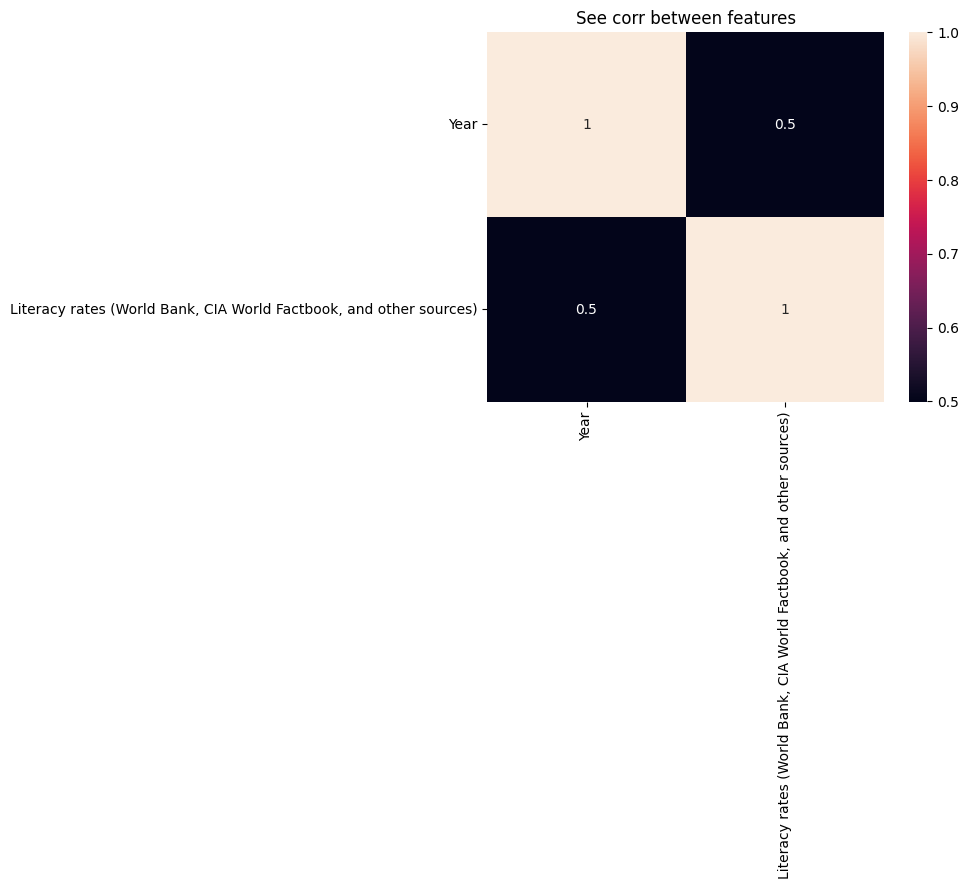

In [39]:
sns.heatmap(df.select_dtypes("number").corr(),annot=True)
plt.title("See corr between features");

In [43]:
years_by_literacyRates=df.groupby("Year")['Literacy rates (World Bank, CIA World Factbook, and other sources)'].median()

In [52]:
years_by_literacyRates.index=years_by_literacyRates.index.sort_values()

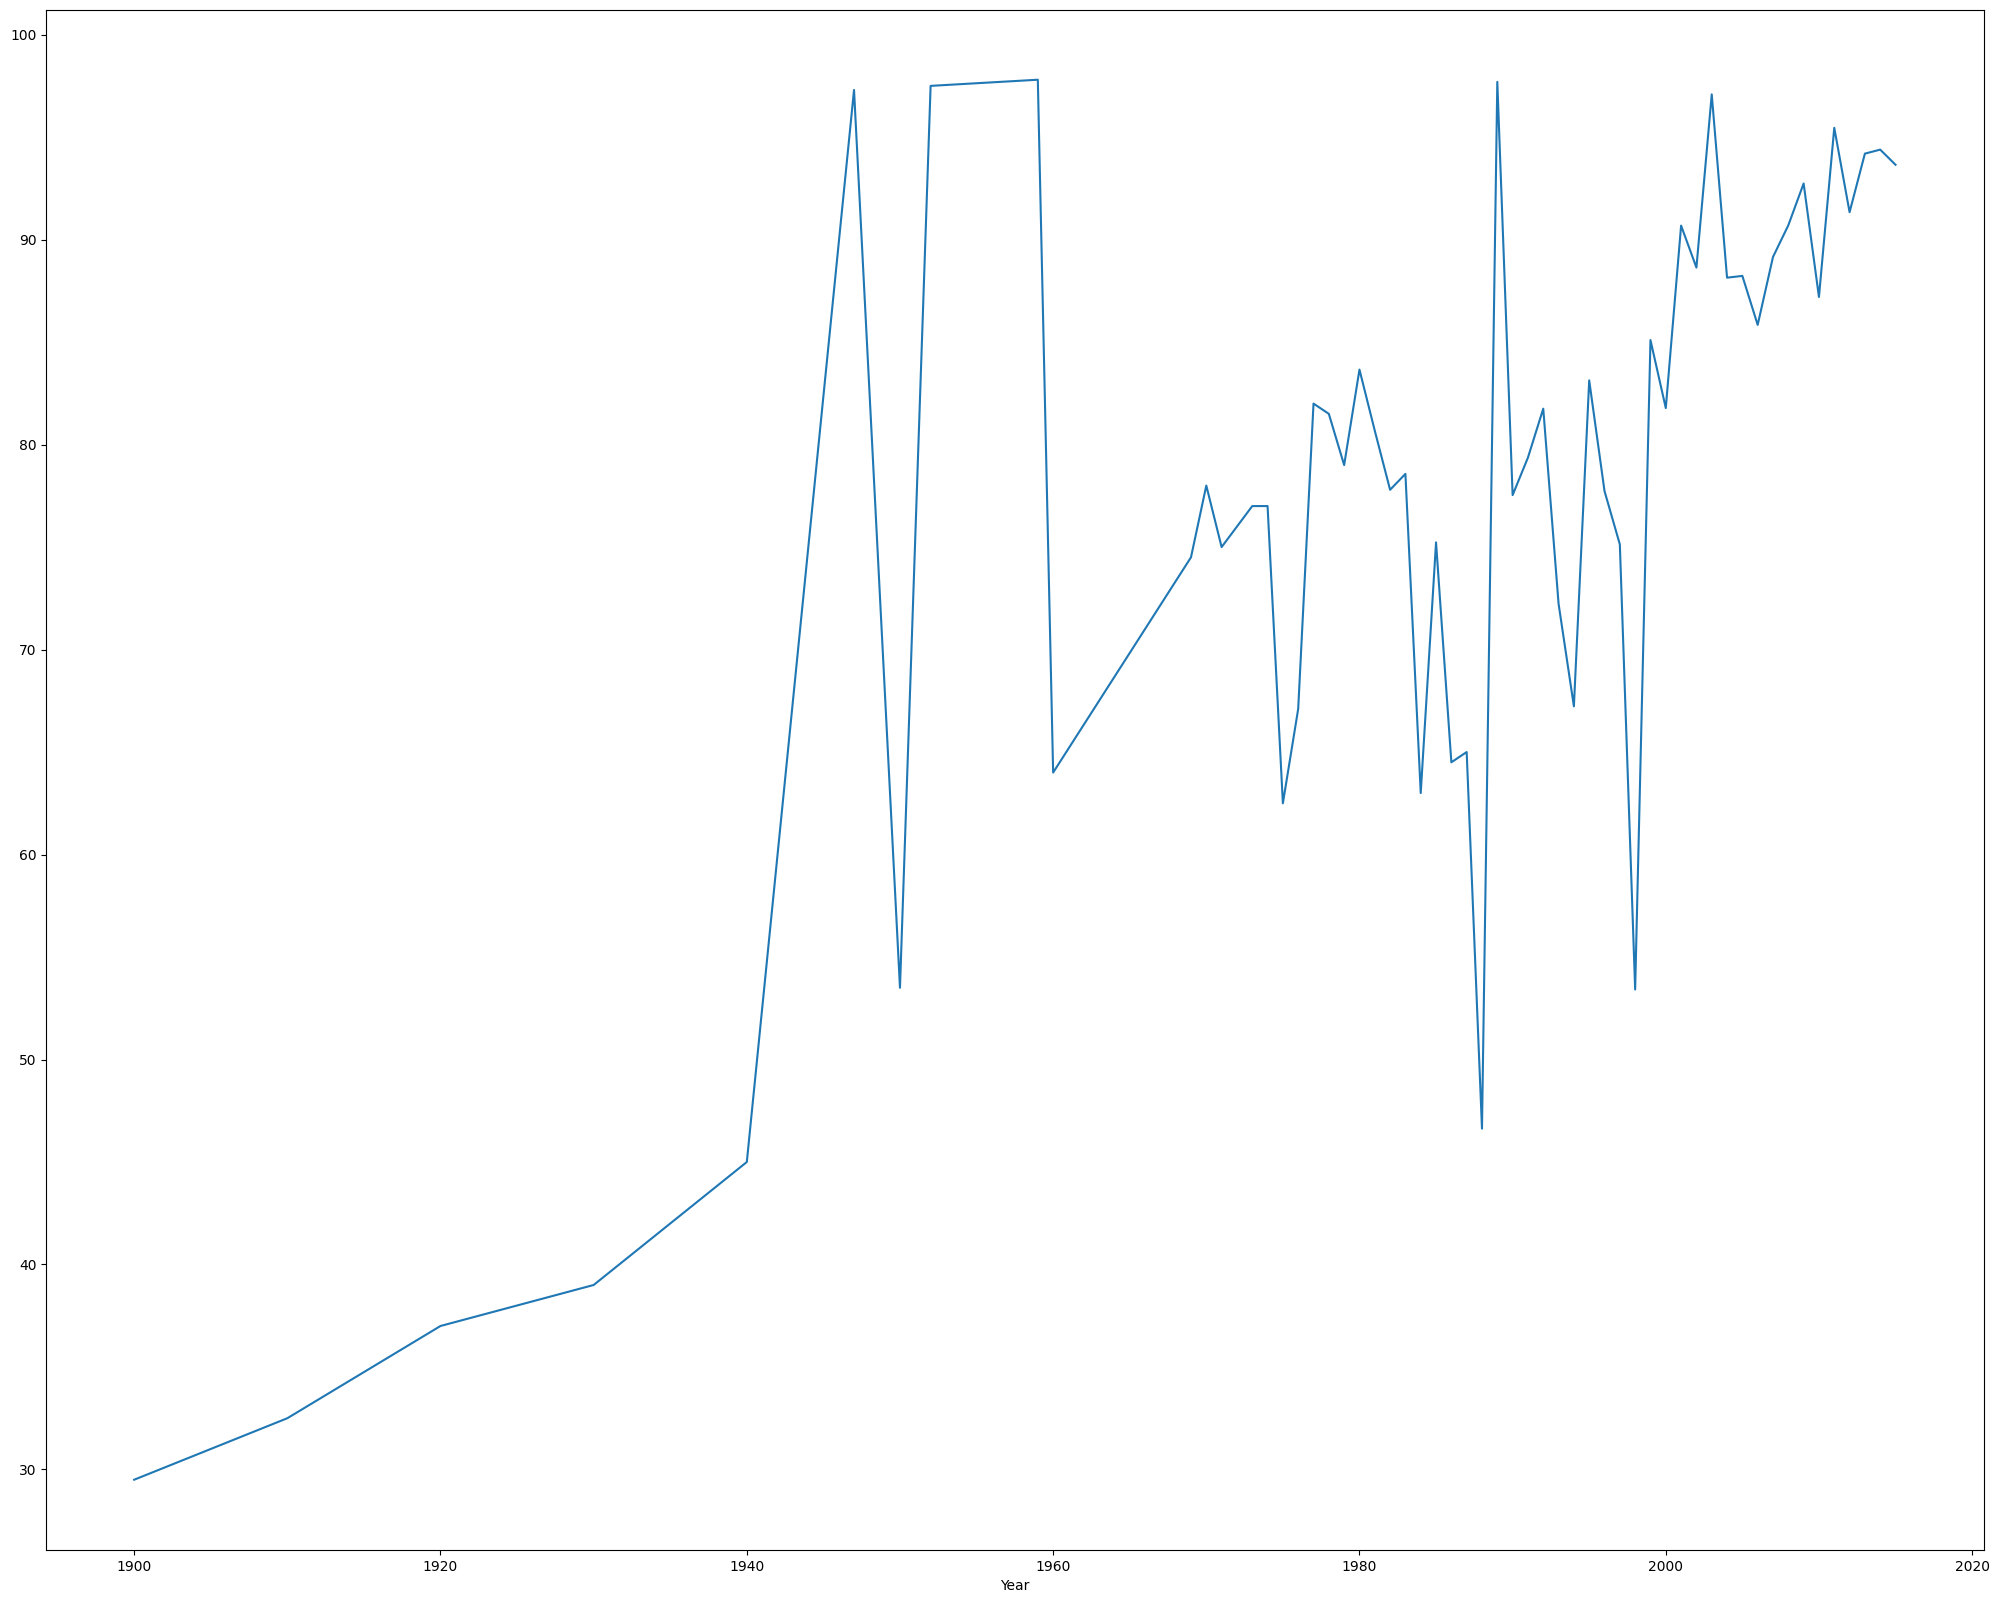

In [58]:
plt.figure(figsize=(25,20))
years_by_literacyRates.plot(kind="line");

In [59]:
df.describe()

,Year,"Literacy rates (World Bank, CIA World Factbook, and other sources)"
count,1364.000000,1364.000000
mean,1991.567449,75.394261
std,26.153012,22.940263
min,1900.000000,8.000000
25%,1980.000000,60.362834
50%,2001.000000,82.910709
75%,2010.000000,94.365443
max,2015.000000,100.000000


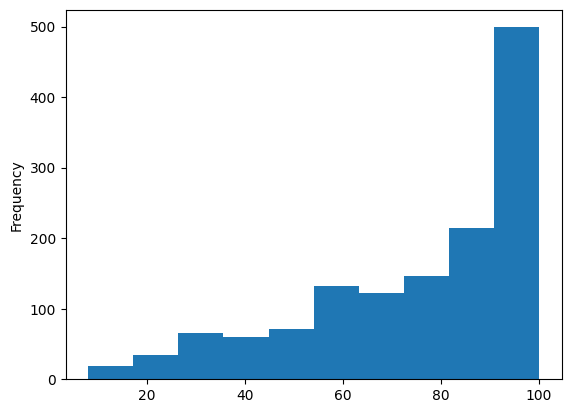

In [61]:
df["Literacy rates (World Bank, CIA World Factbook, and other sources)"].plot(kind="hist");